<a href="https://colab.research.google.com/github/natrask/ENM1050/blob/main/Code%20examples/Lecture03_datafromgoogleform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages for connecting to Spreadsheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

# Authorize Colab to access Spreadsheets
gc = gspread.authorize(creds)

In [2]:
surveyData = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nsWF4ZapF2enpP6-COU4BpYwGMEwly_20mGdCdXKL6o/edit?resourcekey=&gid=726529752#gid=726529752').sheet1
data = surveyData.get_all_values()
print(data)

[['Timestamp', 'How would you rate your programming background coming into this course?', 'Where are you in your studies?', 'Are you in an engineering major?', "Do you have any feedback you'd like to see incorporated in this class? It's a big class, but we do our best to track the trends of what the students are looking for."], ['9/9/2024 9:36:58', '5', 'Other', 'Yes', 'This is nat, hi!'], ['9/9/2024 10:22:30', '5', 'Other', 'Yes', ''], ['9/9/2024 10:54:42', '4', 'Junior', 'Yes', '']]


In [3]:
#This dumps out the list of questions in the survey
data[0]

['Timestamp',
 'How would you rate your programming background coming into this course?',
 'Where are you in your studies?',
 'Are you in an engineering major?',
 "Do you have any feedback you'd like to see incorporated in this class? It's a big class, but we do our best to track the trends of what the students are looking for."]

In [15]:
# This shows the list of responses
data[1:]

[['9/9/2024 9:36:58', '5', 'Other', 'Yes', 'This is nat, hi!'],
 ['9/9/2024 10:22:30', '5', 'Other', 'Yes', ''],
 ['9/9/2024 10:54:42', '4', 'Junior', 'Yes', '']]

In [16]:
# The data is in the wrong direction! We want to be able to scoop up a column,
# but because it's a list of lists we can't grab it directly
# This helper function will traverse the outter list, grab the column_index item
# of the inner list and tack it onto a new list called column_data
#
# Some of these ideas we haven't covered yet (what's a function? a for loop? an
# if statement?). Don't worry! For now we can use this off the shelf. This is
# an example of an idea called *encapsulation*. If we know the inputs and
# outputs of a function, we don't need to worry about what's happening inside

def extract_column(data, column_index):
  column_data = []
  for row in data:
    if len(row) > column_index:
      column_data.append(row[column_index])
  return column_data

# Extract the first column (remember, we start counting at 0)
column_1 = extract_column(data[1:], 1)  # Extract the third column (index 2)
print(column_1)


['5', '5', '4']


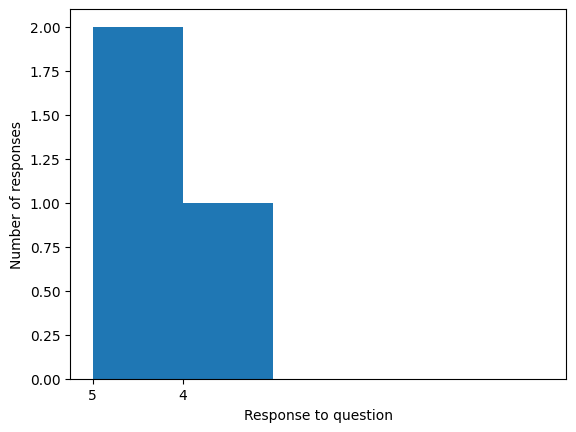

In [19]:
# Generate histogram of data coming from column_1
import matplotlib.pyplot as plt
plt.hist(column_1,bins=5,range=(0,5))
plt.xlabel("Response to question")
plt.ylabel("Number of responses")
plt.show()